In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data.dropna(inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [3]:
inputs = data[['Pclass','Sex','Age','Fare']]
inputs

,Pclass,Sex,Age,Fare
1,1,female,38.0,71.2833
3,1,female,35.0,53.1000
6,1,male,54.0,51.8625
10,3,female,4.0,16.7000
11,1,female,58.0,26.5500
...,...,...,...,...
871,1,female,47.0,52.5542
872,1,male,33.0,5.0000
879,1,female,56.0,83.1583
887,1,female,19.0,30.0000


In [4]:
target = data['Survived']
target

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [5]:
l_sex = LabelEncoder()
inputs['Sex_l'] = l_sex.fit_transform(inputs.loc[:,'Sex'])
inputs = inputs.drop('Sex',axis='columns')
inputs

C:\Users\zagpa\AppData\Local\Temp\ipykernel_27508\1636539432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Sex_l'] = l_sex.fit_transform(inputs.loc[:,'Sex'])


,Pclass,Age,Fare,Sex_l
1,1,38.0,71.2833,0
3,1,35.0,53.1000,0
6,1,54.0,51.8625,1
10,3,4.0,16.7000,0
11,1,58.0,26.5500,0
...,...,...,...,...
871,1,47.0,52.5542,0
872,1,33.0,5.0000,1
879,1,56.0,83.1583,0
887,1,19.0,30.0000,0


In [6]:
model = DecisionTreeClassifier()

In [7]:
model.fit(inputs, target)

DecisionTreeClassifier()

In [8]:
model.score(inputs, target)

1.0

In [9]:
model.predict([[3,4.0,200,0]])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

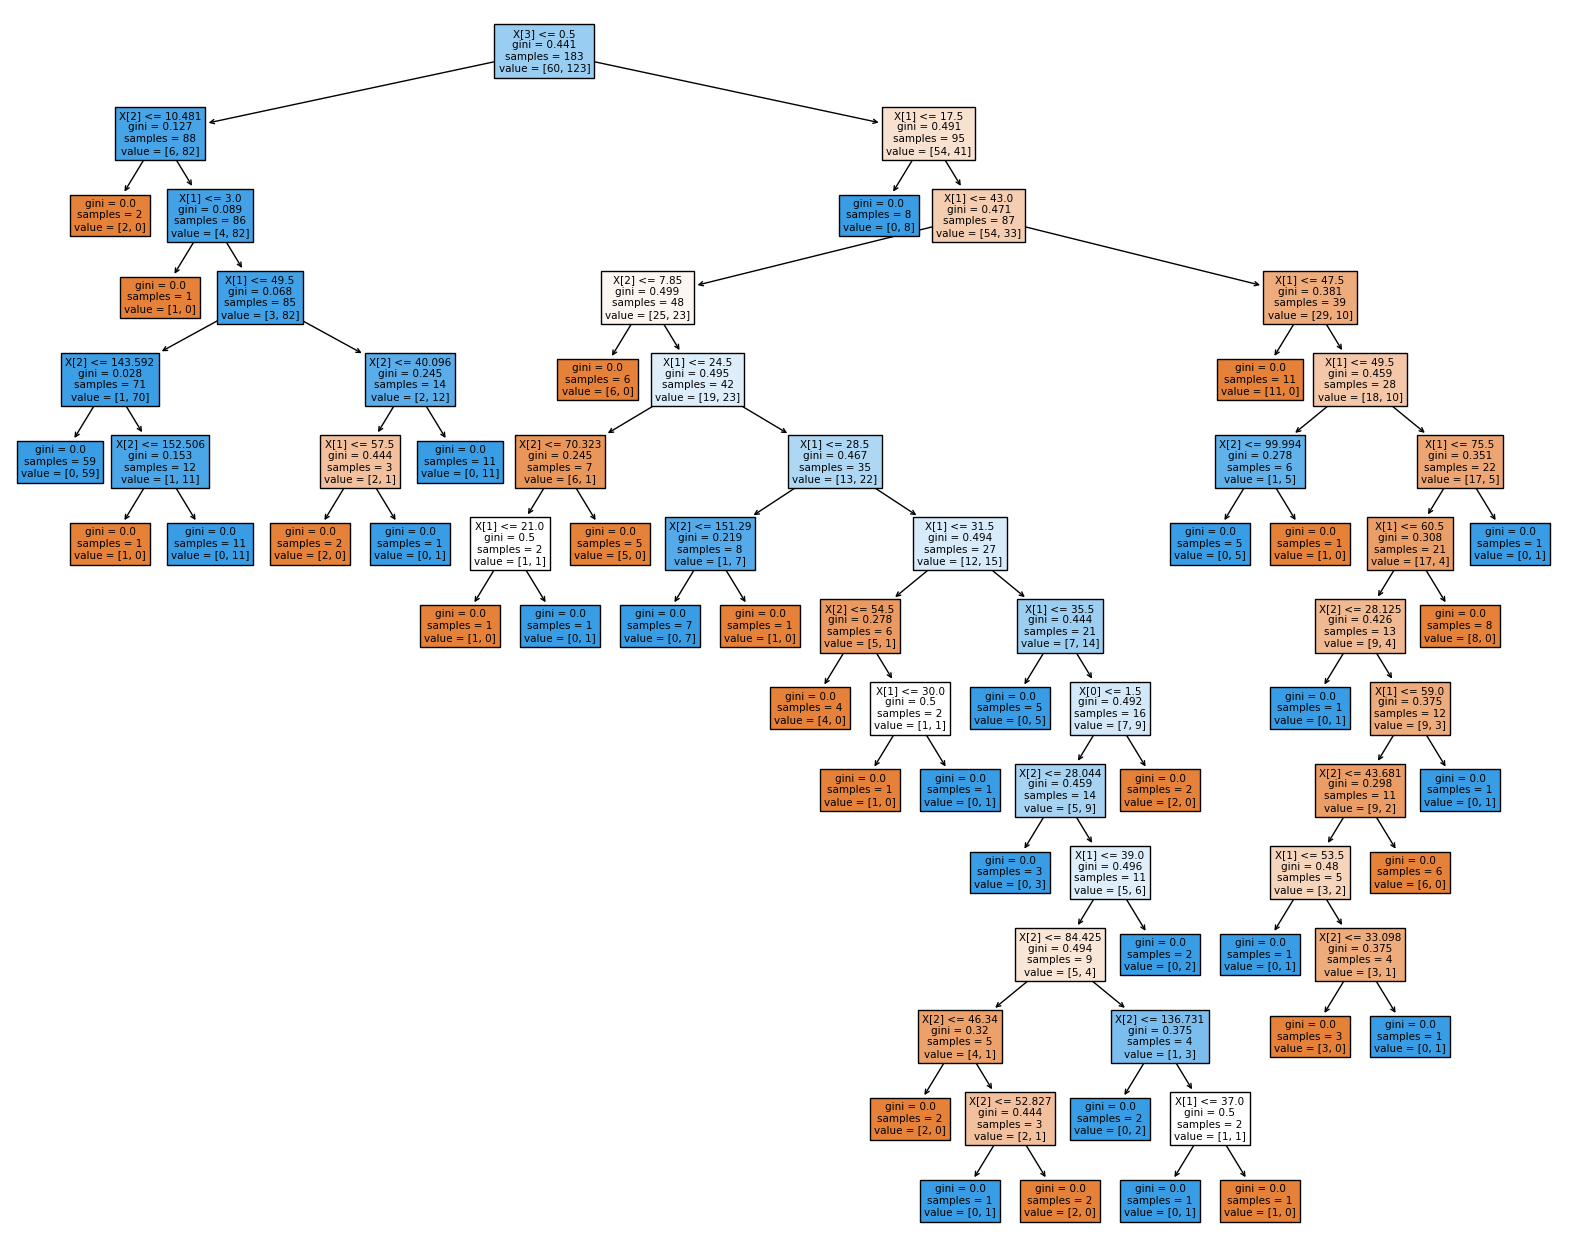

In [10]:
plt.subplots(figsize=(20, 16))
plot_tree(model, filled=True)
plt.show()

In [11]:
predictions = model.predict(inputs)
confusion_matrix(data.Survived, predictions)

array([[ 60,   0],
       [  0, 123]], dtype=int64)